In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ScorePrediction").getOrCreate()

In [0]:
from pyspark.sql import SQLContext 

sqlContext = SQLContext(sc) 

sqlContext

/databricks/spark/python/pyspark/sql/context.py:117: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Out[2]: <pyspark.sql.context.SQLContext at 0x7ff2504b9460>

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.types import StructType, StructField, DoubleType, StringType, IntegerType

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

schema = StructType([
    StructField("spi1", DoubleType()),
    StructField("spi2", DoubleType()),
    StructField("prob1", DoubleType()),
    StructField("prob2", DoubleType()),
    StructField("probtie", DoubleType()),
    StructField("proj_score1", DoubleType()),
    StructField("proj_score2", DoubleType()),
    StructField("importance1", DoubleType()),
    StructField("importance2", DoubleType()),
    StructField("score1", DoubleType()),
    StructField("score2", DoubleType()),
    StructField("xg1", DoubleType()),
    StructField("xg2", DoubleType()),
    StructField("nsxg1", DoubleType()),
    StructField("nsxg2", DoubleType()),
    StructField("adj_score1", DoubleType()),
    StructField("adj_score2", DoubleType()),
    StructField("season", StringType()),
    StructField("date", StringType()),
    StructField("league_id", IntegerType()),
    StructField("team1", StringType()),
    StructField("team2", StringType()),
    StructField("league", StringType())
])

df =sqlContext.sql("select * from  spi_matches") 


In [0]:
df.show()

+------+----------+---------+--------------------+-------------------+--------------------+-----+-----+------+------+-------+-----------+-----------+-----------+-----------+------+------+----+----+-----+-----+----------+----------+
|season|      date|league_id|              league|              team1|               team2| spi1| spi2| prob1| prob2|probtie|proj_score1|proj_score2|importance1|importance2|score1|score2| xg1| xg2|nsxg1|nsxg2|adj_score1|adj_score2|
+------+----------+---------+--------------------+-------------------+--------------------+-----+-----+------+------+-------+-----------+-----------+-----------+-----------+------+------+----+----+-----+-----+----------+----------+
|  2016|2016-07-09|     7921|FA Women's Super ...|    Liverpool Women|             Reading|51.56|50.42|0.4389|0.2767| 0.2844|       1.39|       1.05|       null|       null|     2|     0|null|null| null| null|      null|      null|
|  2016|2016-07-10|     7921|FA Women's Super ...|      Arsenal Women| N

In [0]:
from pyspark.sql import functions as F

# Count the number of non-null values per column
non_null_data = df.select([F.sum(F.col(col).isNotNull().cast("int")).alias(col) for col in df.columns])

# Show the non-null data count
non_null_data.show()

+------+-----+---------+------+-----+-----+-----+-----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+
|season| date|league_id|league|team1|team2| spi1| spi2|prob1|prob2|probtie|proj_score1|proj_score2|importance1|importance2|score1|score2|  xg1|  xg2|nsxg1|nsxg2|adj_score1|adj_score2|
+------+-----+---------+------+-----+-----+-----+-----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+
| 68913|68913|    68913| 68913|68913|68913|68913|68913|68913|68913|  68913|      68913|      68913|      61122|      61122| 66909| 66909|36193|36193|36193|36193|     36193|     36193|
+------+-----+---------+------+-----+-----+-----+-----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+



In [0]:
from pyspark.sql import functions as F

# Count the number of missing values per column
missing_data = df.select([F.sum(F.col(col).isNull().cast("int")).alias(col) for col in df.columns])

# Show the missing data count
missing_data.show()


+------+----+---------+------+-----+-----+----+----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+
|season|date|league_id|league|team1|team2|spi1|spi2|prob1|prob2|probtie|proj_score1|proj_score2|importance1|importance2|score1|score2|  xg1|  xg2|nsxg1|nsxg2|adj_score1|adj_score2|
+------+----+---------+------+-----+-----+----+----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+
|     0|   0|        0|     0|    0|    0|   0|   0|    0|    0|      0|          0|          0|       7791|       7791|  2004|  2004|32720|32720|32720|32720|     32720|     32720|
+------+----+---------+------+-----+-----+----+----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+-----+-----+-----+-----+----------+----------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Creating a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()


# the percentage of missing values for each column
total_rows = df.count()
missing_columns = []

for column in df.columns:
    missing_count = df.where(col(column).isNull()).count()
    missing_percent = (missing_count / total_rows) * 100
    missing_columns.append((column, missing_percent))

# DataFrame to display the missing value percentages
missing_value_df = spark.createDataFrame(missing_columns, ["column_name", "percent_missing"])

#  missing value percentages
missing_value_df.show()

+-----------+------------------+
|column_name|   percent_missing|
+-----------+------------------+
|     season|               0.0|
|       date|               0.0|
|  league_id|               0.0|
|     league|               0.0|
|      team1|               0.0|
|      team2|               0.0|
|       spi1|               0.0|
|       spi2|               0.0|
|      prob1|               0.0|
|      prob2|               0.0|
|    probtie|               0.0|
|proj_score1|               0.0|
|proj_score2|               0.0|
|importance1|11.305559183318097|
|importance2|11.305559183318097|
|     score1| 2.908014453005964|
|     score2| 2.908014453005964|
|        xg1| 47.48015613889977|
|        xg2| 47.48015613889977|
|      nsxg1| 47.48015613889977|
+-----------+------------------+
only showing top 20 rows



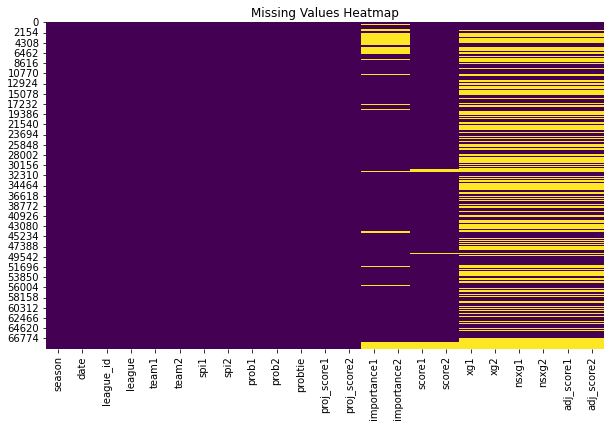

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession

pandas_df = df.toPandas()

# missing value heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pandas_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [0]:
from pyspark.sql import functions as F

# Define a list of numeric column names
numeric_columns = [col for col in df.columns if col != 'season' and col != 'date' and col != 'league_id' and col != 'league' and col != 'team1' and col != 'team2']

# Calculate the mean for each numeric column
mean_values = df.select([F.mean(F.col(col)).alias(col) for col in numeric_columns])

# Fill missing values with the mean for numeric columns
for col in numeric_columns:
    df = df.fillna(mean_values.select(col).first()[0], subset=[col])

# Show the DataFrame with missing values replaced by mean for numeric columns
df.show()


+------+----------+---------+--------------------+-------------------+--------------------+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+------------------+------------------+------------------+------------------+------------------+------------------+
|season|      date|league_id|              league|              team1|               team2| spi1| spi2| prob1| prob2|probtie|proj_score1|proj_score2|       importance1|      importance2|score1|score2|               xg1|               xg2|             nsxg1|             nsxg2|        adj_score1|        adj_score2|
+------+----------+---------+--------------------+-------------------+--------------------+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+------------------+------------------+------------------+------------------+------------------+------------------+
|  2016|2016-07-09|     7921|FA Women's Super ...|    L

In [0]:
park = SparkSession.builder.appName("example").getOrCreate()
columns_to_drop = ['season', 'date', 'league_id', 'team1', 'team2', 'league']
df = df.drop(*columns_to_drop)
df.show()

+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+------------------+------------------+------------------+------------------+------------------+------------------+
| spi1| spi2| prob1| prob2|probtie|proj_score1|proj_score2|       importance1|      importance2|score1|score2|               xg1|               xg2|             nsxg1|             nsxg2|        adj_score1|        adj_score2|
+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+------------------+------------------+------------------+------------------+------------------+------------------+
|51.56|50.42|0.4389|0.2767| 0.2844|       1.39|       1.05|31.660207453944494|31.07845129413305|     2|     0|1.4996930345646924|1.1875752217279605|1.3882029674246377|1.1360887464426812|1.5159359544661946|1.1932840604535795|
|46.61|54.03|0.3572|0.3608| 0.2819|       1.27|       1.28|31.660207453944494|31.07845129413305|    

In [0]:
from pyspark.sql import functions as F

# Get the data types of columns
column_data_types = dict(df.dtypes)

# Select only the numeric columns for correlation
numeric_columns = [col for col, data_type in column_data_types.items() if data_type == 'double' and col != 'score1']

# Calculate the correlation matrix
correlation_matrix = df.select([F.corr('score1', col).alias(col) for col in numeric_columns])
correlation_matrix.show()


+-------------------+--------------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-----------------+--------------------+------------------+--------------------+-----------------+--------------------+
|               spi1|                spi2|             prob1|               prob2|            probtie|        proj_score1|         proj_score2|        importance1|         importance2|              xg1|                 xg2|             nsxg1|               nsxg2|       adj_score1|          adj_score2|
+-------------------+--------------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-----------------+--------------------+------------------+--------------------+-----------------+--------------------+
|0.15081312520900392|-0.06745412863418734|0.3073096826078841|-0.27113845691043864|-0.198800

In [0]:
numeric_columns = [col for col in df.columns if col not in ["league", "team1", "team2", "season", "date", "league_id"]]

# Calculate means for numeric columns
means = df.select([F.avg(col).alias(f"mean_{col}") for col in numeric_columns])

# Calculate medians for numeric columns
medians = df.select([F.expr(f"percentile_approx({col}, 0.5)").alias(f"median_{col}") for col in numeric_columns])

# Calculate modes for numeric columns
modes = df.select([F.expr(f"mode({col})").alias(f"mode_{col}") for col in numeric_columns])

# Calculate variance for numeric columns
variances = df.select([F.variance(col).alias(f"variance_{col}") for col in numeric_columns])

# Show results
means.show()
medians.show()
modes.show()
variances.show()


+-----------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|        mean_spi1|        mean_spi2|        mean_prob1|        mean_prob2|       mean_probtie| mean_proj_score1|  mean_proj_score2| mean_importance1|  mean_importance2|      mean_score1|       mean_score2|          mean_xg1|          mean_xg2|       mean_nsxg1|        mean_nsxg2|   mean_adj_score1|   mean_adj_score2|
+-----------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|43.38686459739099|43.34447549809171|0.4

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# List of categorical columns
categorical_columns = ['league', 'team1', 'team2', 'season', 'date', 'league_id']

# Filter the DataFrame to keep only numeric columns
numeric_columns = [col for col in df.columns if col not in categorical_columns]

# Assemble the features into a single vector column
vector_assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = vector_assembler.transform(df)

# Calculate the correlation matrix
corr_matrix = Correlation.corr(df_assembled, "features").head()
print("Correlation matrix:")
print(corr_matrix[0])


Correlation matrix:
DenseMatrix([[ 1.        ,  0.72961603,  0.40620451, -0.32686331, -0.35914029,
               0.42661838, -0.25115005,  0.22823817,  0.10681215,  0.15081313,
              -0.06088386,  0.14856349, -0.04285086,  0.16932914, -0.07698264,
               0.09832248, -0.03986888],
             [ 0.72961603,  1.        , -0.29426765,  0.36557621, -0.13343888,
              -0.18684838,  0.37374698,  0.10427603,  0.22144915, -0.06745413,
               0.13262603, -0.05371418,  0.14541778, -0.06768038,  0.15594541,
              -0.05878178,  0.09770926],
             [ 0.40620451, -0.29426765,  1.        , -0.95510744, -0.42437289,
               0.89658309, -0.84028904,  0.26522654, -0.2009115 ,  0.30730968,
              -0.25185379,  0.29384953, -0.2549492 ,  0.34380031, -0.3148567 ,
               0.22716701, -0.18518817],
             [-0.32686331,  0.36557621, -0.95510744,  1.        ,  0.13706248,
              -0.77990722,  0.92917576, -0.21297202,  0.25182993, -

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

#  Spark session
spark = SparkSession.builder.appName("feature_correlation").getOrCreate()

selected_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
                    'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
                    'adj_score1', 'adj_score2'] 
# the selected columns to double
for col_name in selected_columns:
    df = df.withColumn(col_name, col(col_name).cast("double"))

# the selected columns into a feature vector
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
assembled_df = assembler.transform(df).select("features")

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(assembled_df, "features").collect()[0][0]

# Convert the correlation matrix to a Pandas DataFrame
import pandas as pd
corr_pd = pd.DataFrame(correlation_matrix.toArray(), columns=selected_columns, index=selected_columns)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pd, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Stop the Spark session when you're done
spark.stop()

In [0]:
# Calculate variance for each numeric column
variance_values = df.select([F.variance(F.col(col)).alias(col) for col in df.columns if col != 'season' and col != 'league_id'])
variance_values.show()


+------------------+-----------------+--------------------+--------------------+--------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+
|              spi1|             spi2|               prob1|               prob2|             probtie|       proj_score1|      proj_score2|      importance1|      importance2|           score1|           score2|                xg1|                xg2|              nsxg1|              nsxg2|        adj_score1|        adj_score2|
+------------------+-----------------+--------------------+--------------------+--------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+
|360.58179736

In [0]:
from pyspark.sql.window import Window

# Calculate the Z-Score for a specific column (e.g., 'xg1')
column_name = 'xg1'
mean_col = mean_values.select(column_name).collect()[0][0]
std_dev_col = df.select(F.stddev(column_name)).collect()[0][0]
z_score_col = (F.col(column_name) - mean_col) / std_dev_col

# Define a threshold for identifying outliers (e.g., Z-Score > 3)
threshold = 3

# Create a new DataFrame with a boolean column indicating outliers
df_outliers = df.withColumn("is_outlier", z_score_col > threshold)

# Show the rows with outliers
df_outliers.filter("is_outlier").show()


+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+----+----+-----+-----+----------+----------+----------+
| spi1| spi2| prob1| prob2|probtie|proj_score1|proj_score2|       importance1|      importance2|score1|score2| xg1| xg2|nsxg1|nsxg2|adj_score1|adj_score2|is_outlier|
+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+----+----+-----+-----+----------+----------+----------+
|74.63|55.56|0.7204|0.0918| 0.1878|       2.18|       0.87|              65.1|             23.4|     4|     0|6.12|0.59| 2.79| 1.15|       3.4|       0.0|      true|
|96.35|69.95|0.9591|0.0071| 0.0337|        3.4|       0.42|              68.5|             27.3|     6|     2|3.86|0.26| 5.29| 0.34|      6.01|       2.1|      true|
|85.38|55.44|0.8277|0.0492| 0.1231|       2.77|       0.51|              63.2|             22.2|     3|     0| 4.1|0.94| 4.97|  1.0|      2.63|       0.0|      true|
|89.

In [0]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

#  the list of numerical columns  to detect outliers
numerical_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 
                     'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 
                     'nsxg2', 'adj_score1', 'adj_score2']

# Define the Z-Score threshold for identifying outliers
threshold = 3

# Create a window specification
window_spec = Window.orderBy()

# Calculate the Z-Score for each numerical column
for column_name in numerical_columns:
    mean_col = mean_values.select(column_name).collect()[0][0]
    std_dev_col = df.select(F.stddev(column_name)).collect()[0][0]
    z_score_col = (F.col(column_name) - mean_col) / std_dev_col
    
    # Create a new column with a boolean indicating outliers
    df = df.withColumn(f"{column_name}_is_outlier", z_score_col > threshold)

# Show the rows with outliers for each numerical variable
for column_name in numerical_columns:
    print(f"Outliers for {column_name}:")
    df.filter(f"{column_name}_is_outlier").show()


Outliers for spi1:
+----+----+-----+-----+-------+-----------+-----------+-----------+-----------+------+------+---+---+-----+-----+----------+----------+---------------+---------------+----------------+----------------+------------------+----------------------+----------------------+----------------------+----------------------+-----------------+-----------------+--------------+--------------+----------------+----------------+---------------------+---------------------+
|spi1|spi2|prob1|prob2|probtie|proj_score1|proj_score2|importance1|importance2|score1|score2|xg1|xg2|nsxg1|nsxg2|adj_score1|adj_score2|spi1_is_outlier|spi2_is_outlier|prob1_is_outlier|prob2_is_outlier|probtie_is_outlier|proj_score1_is_outlier|proj_score2_is_outlier|importance1_is_outlier|importance2_is_outlier|score1_is_outlier|score2_is_outlier|xg1_is_outlier|xg2_is_outlier|nsxg1_is_outlier|nsxg2_is_outlier|adj_score1_is_outlier|adj_score2_is_outlier|
+----+----+-----+-----+-------+-----------+-----------+-----------+

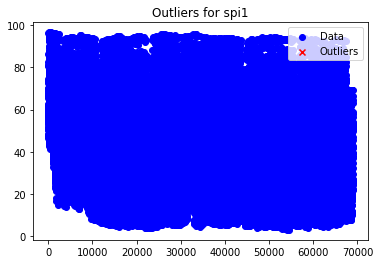

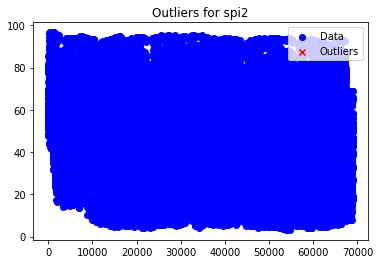

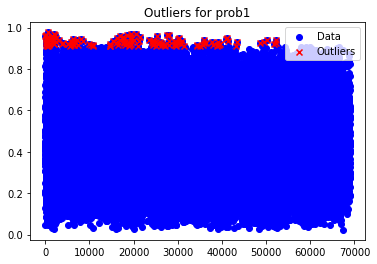

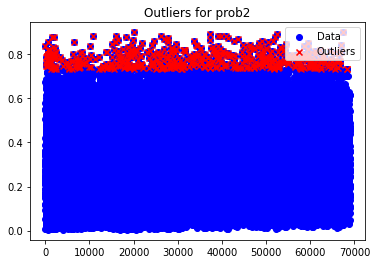

/databricks/python/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


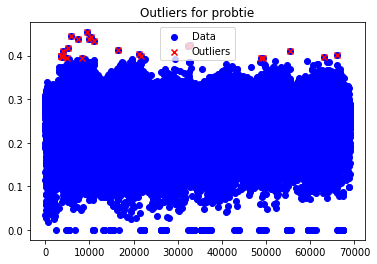

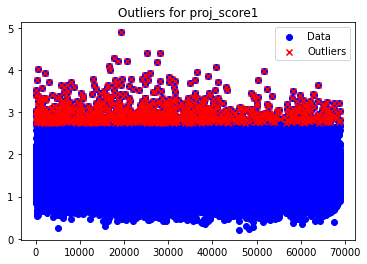

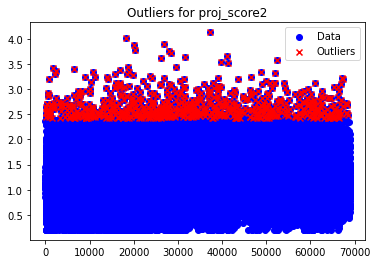

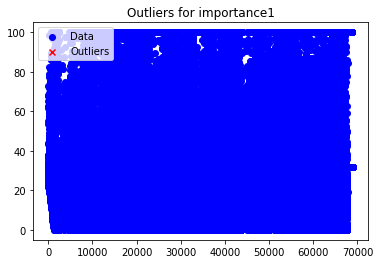

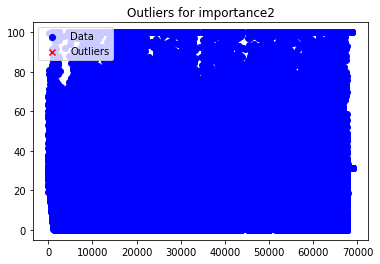

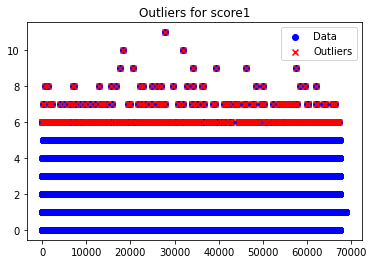

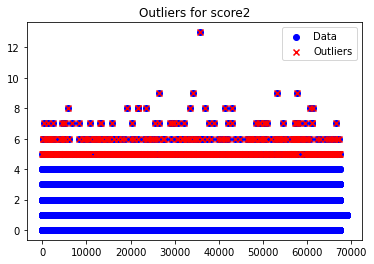

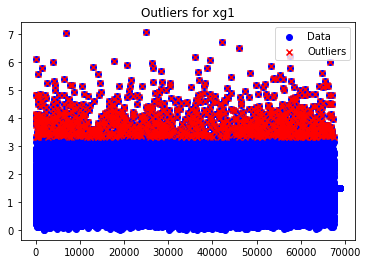

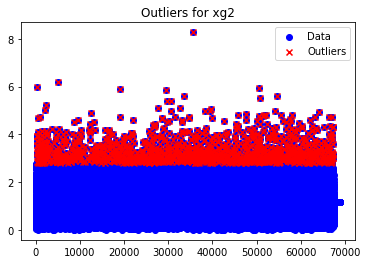

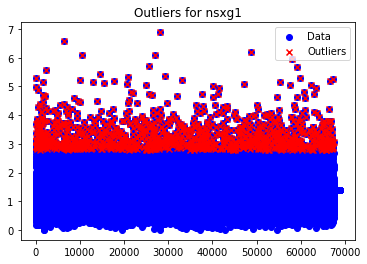

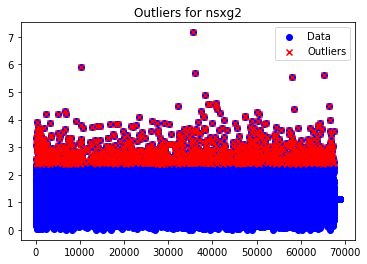

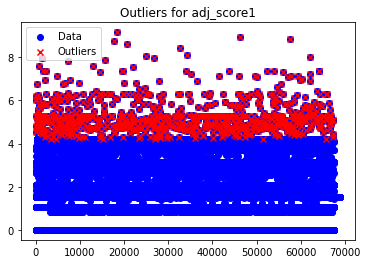

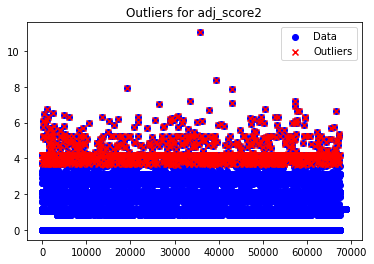

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# List of numerical columns to detect outliers
numerical_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 
                     'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 
                     'nsxg2', 'adj_score1', 'adj_score2']

# Define the Z-Score threshold for identifying outliers
threshold = 3

# Create a figure and axis for each column
for column_name in numerical_columns:
    fig, ax = plt.subplots()
    
    # Extract the data for the column
    data = df.select(column_name).rdd.flatMap(lambda x: x).collect()
    
    # Calculate the Z-Score for the column
    mean_col = mean_values.select(column_name).collect()[0][0]
    std_dev_col = df.select(F.stddev(column_name)).collect()[0][0]
    z_scores = [(x - mean_col) / std_dev_col for x in data]
    
    # Mark outliers by plotting them with a different color
    outliers = [data[i] if z_scores[i] > threshold else None for i in range(len(data))]
    plt.scatter(range(len(data)), data, c='b', label='Data')
    plt.scatter(range(len(data)), outliers, c='r', label='Outliers', marker='x')
    
    ax.set_title(f'Outliers for {column_name}')
    ax.legend()
    
    plt.show()


In [0]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Define the Z-Score threshold for identifying outliers
threshold = 3

# Calculate the Z-Score for all numeric columns
numeric_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
                   'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
                   'adj_score1', 'adj_score2']

for col_name in numeric_columns:
    mean_col = mean_values.select(col_name).collect()[0][0]
    std_dev_col = df.select(F.stddev(col_name)).collect()[0][0]
    z_score_col = (F.col(col_name) - mean_col) / std_dev_col
    df = df.filter(z_score_col <= threshold)

# Show the DataFrame without outliers
df.show()


+-----+-----+------+------+-------+-----------+-----------+------------------+-----------------+------+------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+---------------+----------------+----------------+------------------+----------------------+----------------------+----------------------+----------------------+-----------------+-----------------+--------------+--------------+----------------+----------------+---------------------+---------------------+
| spi1| spi2| prob1| prob2|probtie|proj_score1|proj_score2|       importance1|      importance2|score1|score2|               xg1|               xg2|             nsxg1|             nsxg2|        adj_score1|        adj_score2|spi1_is_outlier|spi2_is_outlier|prob1_is_outlier|prob2_is_outlier|probtie_is_outlier|proj_score1_is_outlier|proj_score2_is_outlier|importance1_is_outlier|importance2_is_outlier|score1_is_outlier|score2_is_outlier|xg1_is_outlier|xg

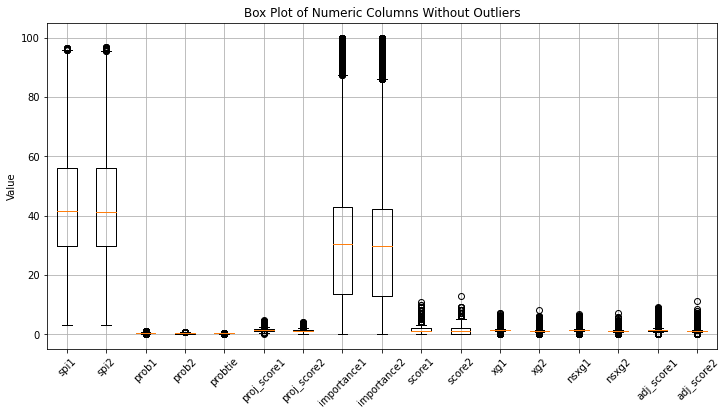

In [0]:
import matplotlib.pyplot as plt

# Select the numeric columns for visualization
numeric_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
                   'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
                   'adj_score1', 'adj_score2']

# Collect the data for visualization
data_to_plot = [df.select(col_name).rdd.flatMap(lambda x: x).collect() for col_name in numeric_columns]

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot)
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45)
plt.title('Box Plot of Numeric Columns Without Outliers')
plt.ylabel('Value')
plt.grid(True)
plt.show()


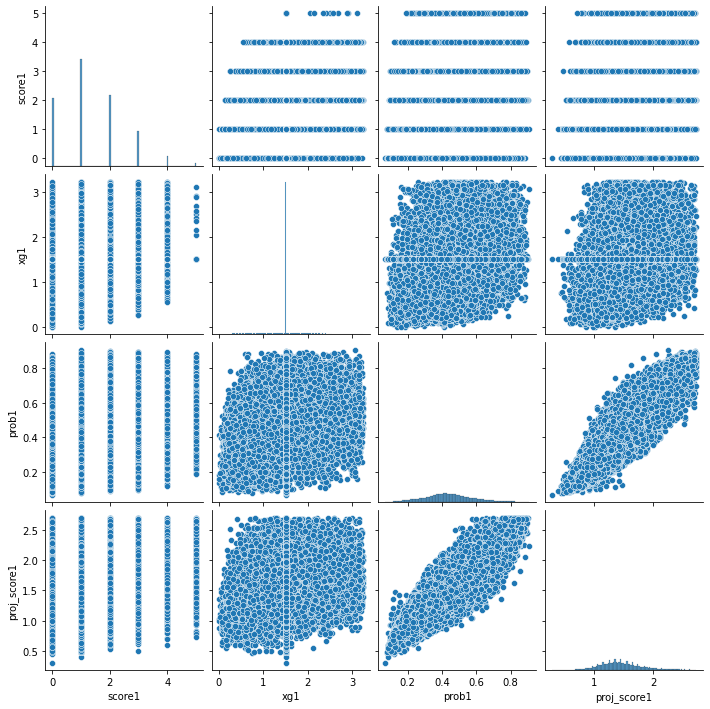

In [0]:
from pyspark.sql.functions import col

#  the selected columns are numeric and handle missing values
selected_columns = ['score1', 'xg1', 'prob1', 'proj_score1']

for col_name in selected_columns:
    df = df.withColumn(col_name, col(col_name).cast("double"))

#PySpark DataFrame to a Pandas DataFrame
pandas_df = df.select(selected_columns).toPandas()

# the pair plot using Seaborn
sns.pairplot(pandas_df)
plt.show()


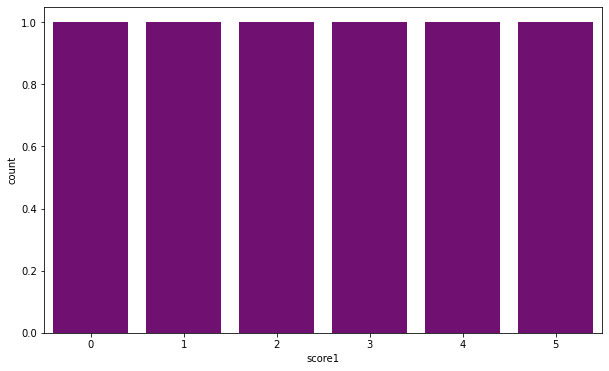

In [0]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

count_df = df.groupBy('score1').agg(F.count('*').alias('count'))
count_df_pandas = count_df.toPandas()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='score1', data=count_df_pandas, color='purple')
plt.show()

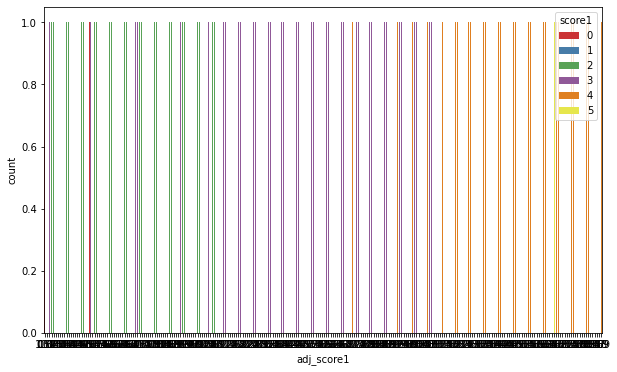

In [0]:
count_df = df.groupBy('adj_score1', 'score1').agg(F.count('*').alias('count'))
count_df_pandas = count_df.toPandas()
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='adj_score1', hue='score1', data=count_df_pandas, palette='Set1')
plt.show()

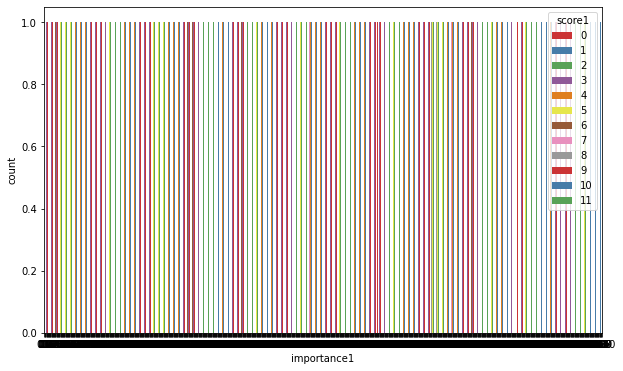

In [0]:
count_df = df.groupBy('importance1', 'score1').agg(F.count('*').alias('count'))
count_df_pandas = count_df.toPandas()
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='importance1', hue='score1', data=count_df_pandas, palette='Set1')
plt.show()

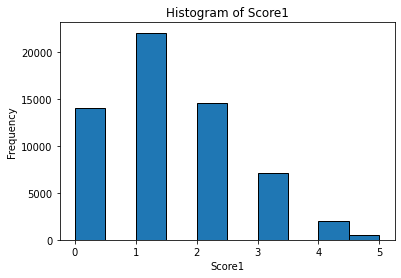

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Select the 'score1' column
score1_data = df.select('score1').rdd.flatMap(lambda x: x)

# Collect the data as a list
score1_values = score1_data.collect()

# Create a histogram using numpy
hist, bin_edges = np.histogram(score1_values, bins=10)

# Plot the histogram
plt.hist(score1_values, bins=bin_edges, edgecolor='k')
plt.xlabel('Score1')
plt.ylabel('Frequency')
plt.title('Histogram of Score1')
plt.show()


In [0]:
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor

assembler = VectorAssembler(inputCols=['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score2', 'importance1', 'importance2', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], outputCol='features')
train_data = assembler.transform(train_data)

rf = RandomForestRegressor(featuresCol='features', labelCol='score1')
model = rf.fit(train_data)

In [0]:
test_data = assembler.transform(test_data)  
predictions = model.transform(test_data)

# Import necessary libraries for evaluation
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import abs

# Create an evaluator for RMSE
rmse_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(predictions)

# Create an evaluator for R-squared
r2_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)

# Create an evaluator for MAE
mae_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="mae")
mae = mae_evaluator.evaluate(predictions)

# Calculate Max Error
max_error = predictions.select(abs(predictions["score1"] - predictions["prediction"]).alias("error")).agg({"error": "max"}).collect()[0][0]

# Print the evaluation results
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"Max Error: {max_error}")


RMSE: 0.8544247766103578
R-squared: 0.4130168489402676
MAE: 0.5827886584483412
Max Error: 3.8153746295809334


In [0]:
from pyspark.ml.regression import RandomForestRegressor
import pandas as pd  

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="label", numTrees=100, seed=42)

# Get feature importances
feature_importances = model.featureImportances

# Combine feature names and importances
selected_columns = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
                    'importance1', 'importance2', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
                    'adj_score1', 'adj_score2']
feature_importance_df = pd.DataFrame(list(zip(selected_columns, feature_importances.toArray())),
                                     columns=['Feature', 'Importance'])

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance
13        nsxg2    0.690454
9        score2    0.164157
2         prob1    0.051815
3         prob2    0.032482
4       probtie    0.017125
11          xg2    0.015318
14   adj_score1    0.012989
12        nsxg1    0.005937
0          spi1    0.002798
10          xg1    0.002472
1          spi2    0.001334
8   importance2    0.000942
6   proj_score2    0.000892
5   proj_score1    0.000812
7   importance1    0.000474


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

# Define the feature columns 
assembler = VectorAssembler(inputCols=['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score2', 'importance1', 'importance2', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'], outputCol='features')

# Create a LinearRegression model
lr = LinearRegression(featuresCol='features', labelCol='score1')

# Fit the model to the training data
lr_model = lr.fit(train_data)


In [0]:
from pyspark.ml.regression import LinearRegression

# Fit a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='score1')
lr_model = lr.fit(train_data)

# Access the intercept and coefficients
intercept = lr_model.intercept
coefficients = lr_model.coefficients

# Create a list of feature names corresponding to their order in the coefficients
feature_names = ['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score2', 'importance1', 'importance2', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']

# Create a dictionary to map feature names to coefficients
feature_coefficients = {feature_names[i]: coef for i, coef in enumerate(coefficients)}

# Print the intercept and coefficients with feature names
print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in feature_coefficients.items():
    print(f"{feature}: {coef}")


Intercept: 45.785336271332916
Coefficients:
spi1: 0.008946607058407214
spi2: -0.0071853942485085405
prob1: -45.427453062342366
prob2: -46.64768048806081
probtie: -46.54642350248745
proj_score2: 0.30356082748315366
importance1: -0.000488938154337207
importance2: -0.0007647066837250272
score2: 0.0005934812728433362
xg1: 0.00425263434189875
xg2: -0.005040072023161458
nsxg1: -0.10054275122849651
nsxg2: 0.04019464582098636
adj_score1: 0.9716991907236258
adj_score2: -0.009562064902201094


In [0]:
from pyspark.ml.feature import VectorAssembler

# Use the trained Linear Regression model 
predictions = lr_model.transform(test_data)

# Import necessary libraries for evaluation
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import abs

# Create evaluators and calculate evaluation metrics
rmse_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(predictions)

r2_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)

mae_evaluator = RegressionEvaluator(labelCol="score1", predictionCol="prediction", metricName="mae")
mae = mae_evaluator.evaluate(predictions)

max_error = predictions.select(abs(predictions["score1"] - predictions["prediction"]).alias("error")).agg({"error": "max"}).collect()[0][0]

# Print the evaluation results
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"Max Error: {max_error}")


RMSE: 0.8345895376893211
R-squared: 0.43995381843645154
MAE: 0.555584808734509
Max Error: 3.889199502331664


In [0]:
The Best Model is the Multiples Linear Regression.